In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus = False)

In [3]:
df = pd.read_excel('C:/Users/ST-USER/Desktop/1월 발제/data/data.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      2400 non-null   int64         
 1   도서명     2400 non-null   object        
 2   저자명     2400 non-null   object        
 3   출판사명    2400 non-null   object        
 4   출간일     2400 non-null   datetime64[ns]
 5   분야      2400 non-null   object        
 6   정가      2400 non-null   int64         
 7   쪽수      2400 non-null   int64         
 8   월       2400 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 168.9+ KB


In [5]:
df

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
0,1,트렌드 코리아 2020,김난도,미래의창,2019-10-24,경제/경영,18000,448,12
1,2,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,위즈덤하우스,2019-10-30,인문,16000,392,12
2,3,지쳤거나 좋아하는 게 없거나,글배우,강한별,2019-09-04,시/에세이,13500,248,12
3,4,팩트풀니스(양장본 HardCover),한스 로슬링,김영사,2019-03-10,인문,19800,474,12
4,5,에이트(양장본 HardCover),이지성,차이정원,2019-10-21,자기계발,17000,308,12
...,...,...,...,...,...,...,...,...,...
2395,196,해커스 토익 700+ LC+RC(한 권으로 끝내는),해커스 어학연구소,해커스어학연구소,2020-04-17,외국어,19500,596,11
2396,197,인간 실격(세계문학전집 103),다자이 오사무,민음사,2012-04-10,소설,8000,192,11
2397,198,주식 네 이놈. 2: 기법편,문제룡,지서연,2020-11-21,경제/경영,20000,292,11
2398,199,어린이 명심보감(읽으면서 바로 써먹는)(맛있는 공부 33),한날,파란정원,2020-09-15,어린이(초등),12000,224,11


In [6]:
df['월'] = df['월'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      2400 non-null   int64         
 1   도서명     2400 non-null   object        
 2   저자명     2400 non-null   object        
 3   출판사명    2400 non-null   object        
 4   출간일     2400 non-null   datetime64[ns]
 5   분야      2400 non-null   object        
 6   정가      2400 non-null   int64         
 7   쪽수      2400 non-null   int64         
 8   월       2400 non-null   category      
dtypes: category(1), datetime64[ns](1), int64(3), object(4)
memory usage: 152.9+ KB


## 일년동안 항상 베스트셀러에 포함되어 있던 34권의 책 이름

In [8]:
count_n = df['도서명'].value_counts()
count_n[:33]

아몬드(양장본 HardCover)                                          12
부의 인문학                                                      12
아주 작은 습관의 힘                                                 12
우리가 빛의 속도로 갈 수 없다면(양장본 HardCover)                           12
선량한 차별주의자                                                   12
총 균 쇠                                                       12
정의란 무엇인가(마이클 샌델)                                            12
언어의 온도(170만부 기념 에디션)                                        12
하버드 상위 1퍼센트의 비밀                                             12
이기적 유전자(40주년 기념판)                                           12
당신이 옳다(40만 부 기념 '한 사람' 리커버)                                 12
타이탄의 도구들(리커버 에디션)                                           12
돌이킬 수 없는 약속                                                 12
팩트풀니스(양장본 HardCover)                                        12
지쳤거나 좋아하는 게 없거나                                             12
설민석의 조선왕조실록                                            

## 중복제거

In [9]:
df1 = df.drop_duplicates(['도서명'], ignore_index = True)
df1

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
0,1,트렌드 코리아 2020,김난도,미래의창,2019-10-24,경제/경영,18000,448,12
1,2,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,위즈덤하우스,2019-10-30,인문,16000,392,12
2,3,지쳤거나 좋아하는 게 없거나,글배우,강한별,2019-09-04,시/에세이,13500,248,12
3,4,팩트풀니스(양장본 HardCover),한스 로슬링,김영사,2019-03-10,인문,19800,474,12
4,5,에이트(양장본 HardCover),이지성,차이정원,2019-10-21,자기계발,17000,308,12
...,...,...,...,...,...,...,...,...,...
884,184,권력은 사람의 뇌를 바꾼다,강준만,인물과사상사,2020-10-26,정치/사회,17000,360,11
885,189,시가 나에게 살라고 한다,나태주 (엮음),&(앤드),2020-11-10,시/에세이,14500,260,11
886,191,수상한 이웃집(잠뜰TV 오리지널 스토리북)(양장본 HardCover),잠뜰TV (원작),서울문화사,2020-10-29,어린이(초등),11000,1,11
887,198,주식 네 이놈. 2: 기법편,문제룡,지서연,2020-11-21,경제/경영,20000,292,11


## 베스트셀러를 가장 많이 낸 저자 상위 n명(40)

In [10]:
count_a = df1['저자명'].value_counts()
count_a[:40]

설민석                  14
David Cho            10
고토게 코요하루              9
흔한남매 (원작)             8
히가시노 게이고              8
유대영                   7
김미영                   7
박시연                   6
히로시마 레이코              6
백희나                   6
정세랑                   6
알베르 카뮈                5
조용                    5
한날                    5
채사장                   5
이도우                   4
Eiichiro Oda          4
글배우                   4
김현수                   4
김리리                   3
헤르만 헤세                3
마이클 샌델                3
홍춘욱                   3
김난도                   3
트롤                    3
신태훈                   3
전극진                   3
박영숙                   3
법정                    3
조지 오웰                 3
데일 카네기                3
정재승 (기획)              3
존 리                   3
스토리 a.                3
오은영                   3
Haruichi Furudate     3
해커스 어학연구소             3
김혜련                   3
최재붕                   2
안녕달                   2
Name: 저자명, dtype: int64

## 설민석의 베스트셀러 목록

In [11]:
s = df1['저자명'] == '설민석'
s = df1[s]
s

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
6,7,설민석의 한국사 대모험. 12,설민석,아이휴먼,2019-12-05,어린이(초등),12000,212,12
33,34,설민석의 삼국지. 1,설민석,세계사,2019-07-17,인문,22000,440,12
35,36,설민석의 조선왕조실록,설민석,세계사,2016-07-20,역사/문화,22000,504,12
131,132,한국을 빛낸 100명의 위인들(설민석 쌤과 함께 부르는)(사운드북),설민석,아이휴먼,2017-12-01,유아(0~7세),16000,22,12
165,166,설민석의 세계사 대모험. 3,설민석,단꿈아이,2019-09-24,어린이(초등),12000,200,12
167,168,설민석의 무도 한국사 특강(개정판),설민석,휴먼큐브,2019-01-29,역사/문화,22000,433,12
207,60,설민석의 세계사 대모험. 4,설민석,단꿈아이,2020-01-13,어린이(초등),12000,208,1
336,9,설민석의 한국사 대모험. 13(반양장),설민석,아이휴먼,2020-03-23,어린이(초등),12000,200,3
412,48,설민석의 세계사 대모험. 5,설민석,단꿈아이,2020-04-15,어린이(초등),12000,208,4
497,86,설민석의 책 읽어드립니다,설민석,단꿈아이,2020-05-18,인문,15000,212,5


## David Cho의 베스트셀러 목록

In [12]:
d = df1['저자명'] == 'David Cho'
d = df1[d]
d

,순위,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
19,20,해커스 토익 기출 보카 TOEIC VOCA(개정판 5판),David Cho,해커스어학연구소,2020-03-05,외국어,12900,566,12
69,70,해커스 토익 RC 리딩(Reading)(개정판 8판),David Cho,해커스어학연구소,2020-03-02,외국어,18800,800,12
89,90,해커스 토익 LC 리스닝(Listening)(개정판 8판),David Cho,해커스어학연구소,2020-03-18,외국어,18800,626,12
141,142,해커스 보카(Hackers Vocabulary)(개정판 2판),David Cho,해커스어학연구소,2015-07-01,외국어,16900,366,12
192,193,해커스 토익 스타트 리딩(Reading) RC(개정판 4판),David Cho,해커스어학연구소,2020-02-20,외국어,14900,580,12
210,70,해커스 토익 스타트 리스닝(Listening) LC(개정판 4판),David Cho,해커스어학연구소,2020-03-09,외국어,14900,572,1
232,140,해커스 토익스피킹(토스) Start(2주 만에 끝내는)(개정판 4판),David Cho,해커스어학연구소,2020-01-06,외국어,19800,552,1
240,161,해커스 토플 리딩(Hackers TOEFL Reading),David Cho,해커스어학연구소,2019-08-01,외국어,23900,544,1
245,177,해커스 토익 중급 리딩(Hackers TOEIC Reading)(신토익 Editio...,David Cho,해커스어학연구소,2020-05-22,외국어,14900,504,1
251,186,해커스 뉴텝스(New TEPS) 기출 보카,David Cho,해커스어학연구소,2018-10-17,외국어,14900,568,1


## 베스트셀러 가격 분포 확인

Text(0, 0.5, 'Relative Frequncy')

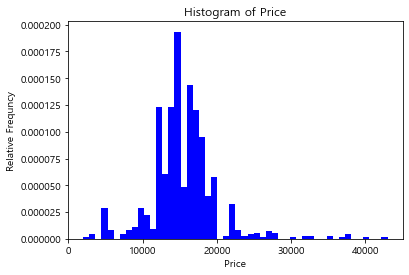

In [13]:
ax = plt.subplot()
ax.hist(df1['정가'], bins=50, density=True, color="blue")    # Y축이 상대빈도로, 색깔이 red로 변경함 
ax.set_title("Histogram of Price")
ax.set_xlabel("Price")
ax.set_ylabel("Relative Frequncy")

## 베스트셀러 쪽수 분포 확인

Text(0, 0.5, 'Relative Frequncy')

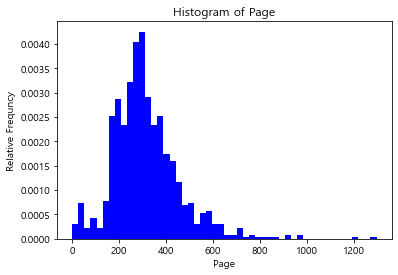

In [14]:
ax = plt.subplot()
ax.hist(df1['쪽수'], bins=50, density=True, color="blue")    # Y축이 상대빈도로, 색깔이 red로 변경함 
ax.set_title("Histogram of Page")
ax.set_xlabel("Page")
ax.set_ylabel("Relative Frequncy")

## 정가와 쪽수 산점도

Text(0, 0.5, 'Page')

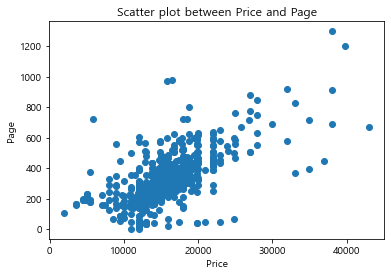

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(df1['정가'], df1['쪽수'])
ax.set_title("Scatter plot between Price and Page")
ax.set_xlabel("Price")
ax.set_ylabel("Page")

## 분야별 베스트셀러 분포 확인

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


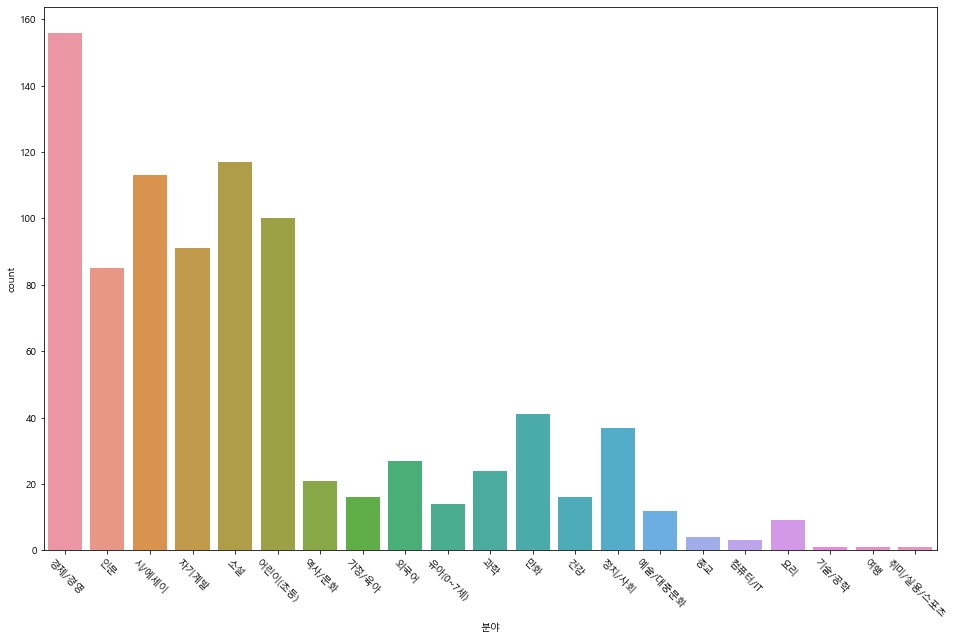

In [21]:
plt.figure(figsize = (16,10))
sns.countplot(df1['분야'])
plt.xticks(rotation = - 45 )
plt.show()

## 정가와 쪽수가 선형 관계인지 확인해보기

In [22]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

In [26]:
fit = ols('정가 ~ 쪽수',data=df1).fit()

### 모델 확인

In [27]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     정가   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     687.3
Date:                Mon, 08 Feb 2021   Prob (F-statistic):          1.26e-112
Time:                        10:48:15   Log-Likelihood:                -8485.1
No. Observations:                 889   AIC:                         1.697e+04
Df Residuals:                     887   BIC:                         1.698e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9013.5419    271.510     33.198      0.000    8480.664    9546.420
쪽수            20.4583      0.780     26.217      0.000      18.927      21.990
==============================================================================
Omnibus:                      146.200   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1641.696
Skew:                           0.346   Prob(JB):                         0.00
Kurtosis:                       9.621   Cond. No.                         832.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
resid = fit.resid

In [36]:
fitted = fit.predict(df1)

### 잔차

In [29]:
resid

0      -178.859377
1     -1033.194686
2      -587.199769
3      1089.224874
4      1685.302349
          ...     
884     621.470851
885     167.300655
886    1965.999846
887    5012.635117
888     439.802772
Length: 889, dtype: float64

### qq-plot

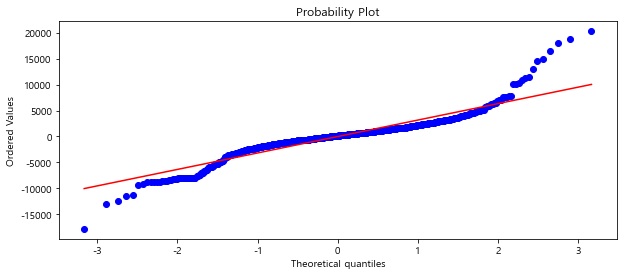

In [30]:
from scipy.stats import probplot
plt.figure()
probplot(resid, plot=plt)
plt.show()

### shapiro 테스트(p-value가 0.05보다 커야 정규성 만족)

In [42]:
from scipy import stats
import scipy.stats
stats.shapiro(resid)

ShapiroResult(statistic=0.8819159865379333, pvalue=1.906000482952475e-25)

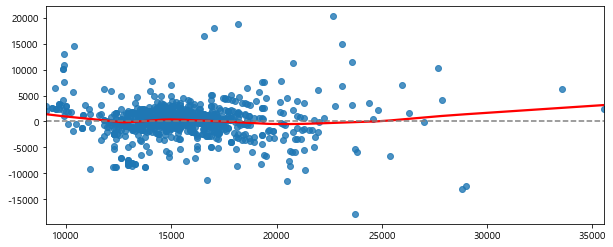

In [37]:
sns.regplot(fitted, resid, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

In [44]:
sr = scipy.stats.zscore(resid)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

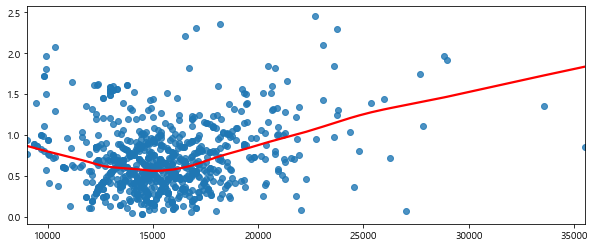

In [45]:
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})